# Visualizing What Convnets Learn

The representation learned by convnets are highly amenable to visuakiaztion, in large part because they're representations of visual concepts. 

## Visualizing intermediate activations 

Visualizing intermediate activations constists of displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input.

In [30]:
from google.colab import files 

files.upload()

{}

In [31]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

#### Cloning datasets

In [32]:
! git clone https://gitlab.com/Yuraist/ml-datasets.git

fatal: destination path 'ml-datasets' already exists and is not an empty directory.


#### Organize files 

In [33]:
import os, shutil

original_dataset_dir = '/content/ml-datasets/train'

base_dir = '/content/cats_and_dogs'
if not os.path.exists(base_dir):
  os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Cats images

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)
  
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)
  
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)
  
# Dogs images
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

FileExistsError: ignored

#### Preprocessing a single image

In [34]:
img_path = '/content/cats_and_dogs/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

# Preprocess the image into 4D tensor
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


#### Displaying the test picture

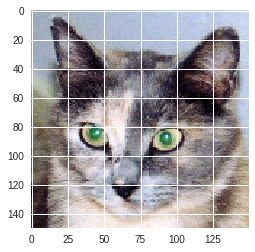

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

#### Instantiationg a model from an input tensor and a list of output tensors

In order to extract the feature maps you want to look at, you'll create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. To do this, you’ll use the Keras class Model. A model is instantiated using two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors). The resulting class is a Keras model, just like the Sequential models you’re familiar with, mapping the specified inputs to the specified outputs. What sets the Model class apart is that it allows for models with multiple outputs, unlike Sequential.

In [0]:
from keras import models 

# Extract the outputs of the top eight layers 
layer_outputs = [layer.output for layer in model.layers[:8]]
# Create a model that will return these outputs, given the model input 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

#### Running the model in predict mode

In [0]:
activations = activation_model.predict(img_tensor)

In [38]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


It's a 148x148 feature map with 32 channels. 

#### Visualizing the fourth channel

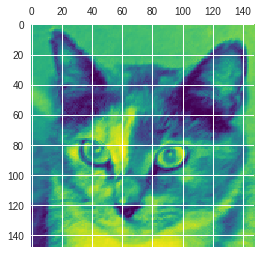

In [39]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

#### Visualizing the seventh channel

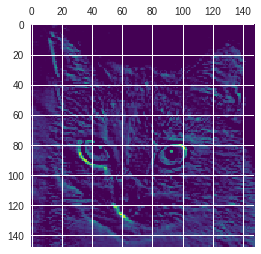

In [40]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

#### Visualizing every channel in every intermediate activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


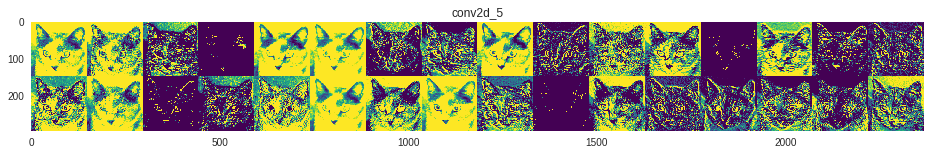

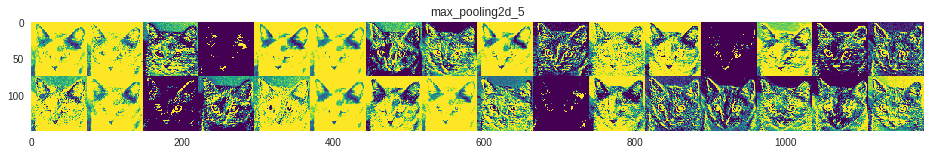

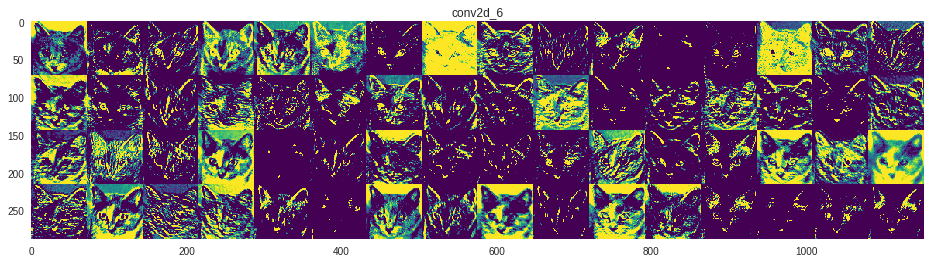

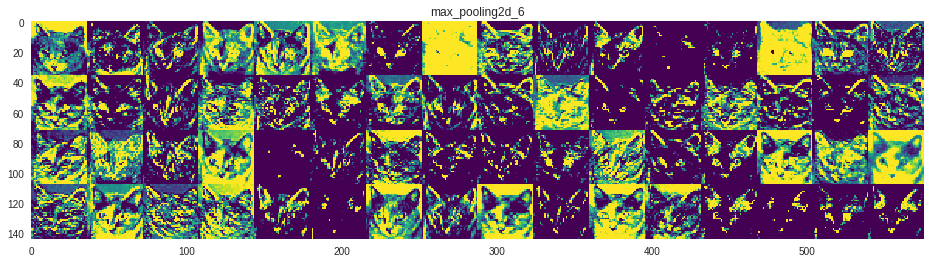

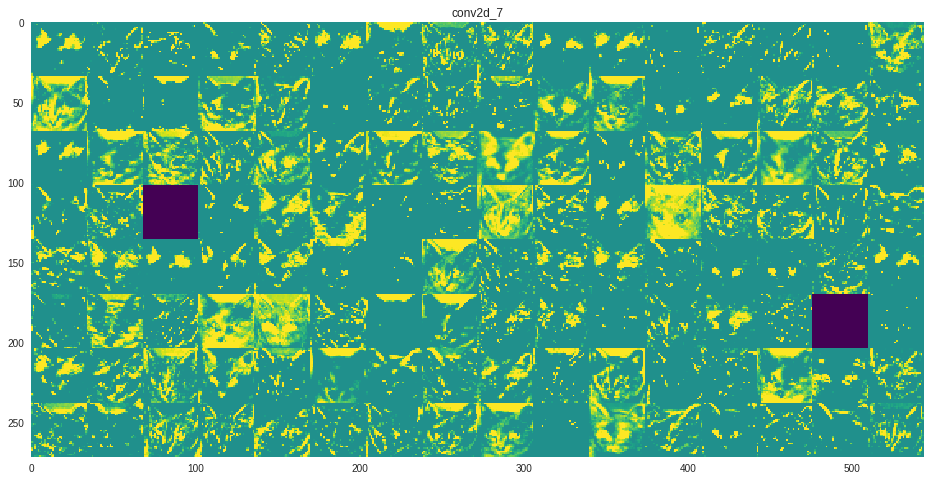

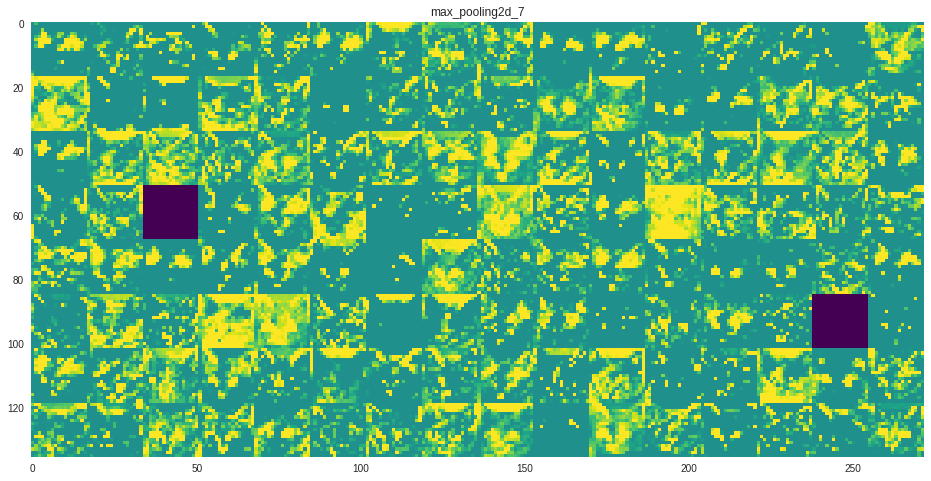

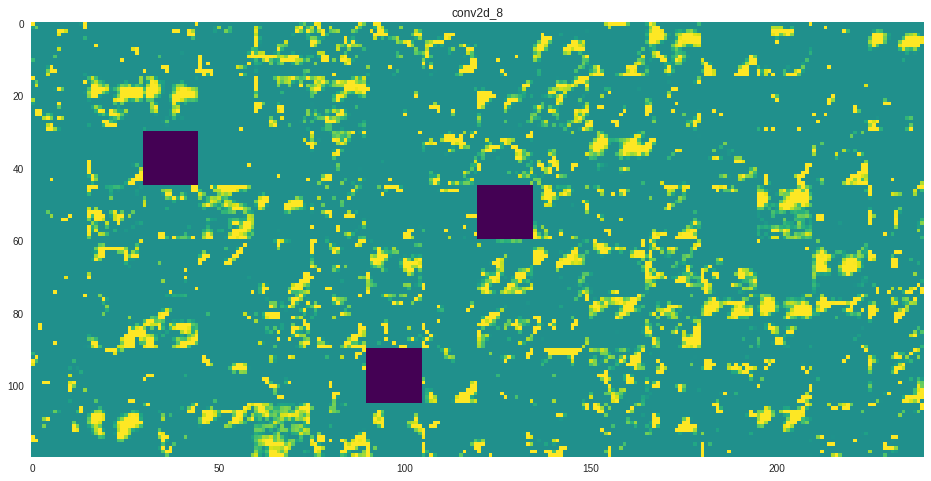

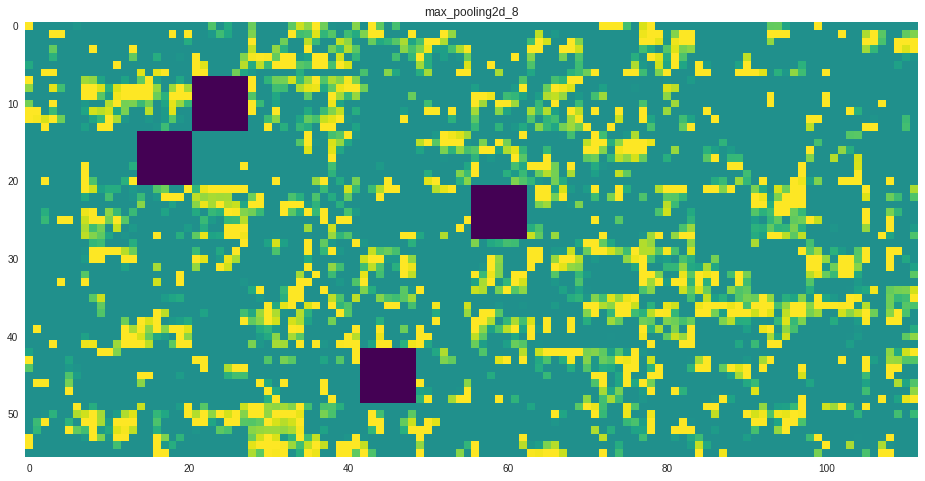

In [41]:
# Names of the layers
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
  
images_per_row = 16

# Display the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
  # Number of features in the feature map 
  n_features = layer_activation.shape[-1]
  
  # The feature map has shape (1, size, size, n_features)
  size = layer_activation.shape[1]
  
  # Tile the activation channels in this matrix
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size: (col + 1) * size, 
                  row * size: (row + 1) * size] = channel_image
      
  scale = 1./size
  plt.figure(figsize=(scale * display_grid.shape[1],
                     scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

There are a few things to note here:
* The first layer acts as a collection of various edge detectors. 
* As you go higher, the activations become increasingly abstract and less visually interpretable. They begin to encode higher-level concepts such as "cat ear" and "cat eye". Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.
*  The sparsity of the activations increases with the depth of the layer: in the first layer, all filters are activated by the input image; but in the following layers, more and more filters are blank. This means the pattern encoded by the filter isn't found in the input image.

### Visualizing convnet filters

Another easy way to inspect the filters learned by convnets is to display the visual pat- tern that each filter is meant to respond to. This can be done with gradient ascent in input space: applying gradient descent to the value of the input image of a convnet so as to maximize the response of a specific filter, starting from a blank input image. The resulting input image will be one that the chosen filter is maximally responsive to.

#### Defining the loss tensor for filter visualization

In [0]:
from keras.applications import VGG16 
from keras import backend as K

model = VGG16(weights='imagenet',
             include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

#### Obtaining the gradient of the loss with regard to the input

In [0]:
# The call to gradients returns a list of tensors. 
# Hence, you keep only the first element – which is a tensor
grads = K.gradients(loss, model.input)[0]

A non-obvious trick to use to help the gradient-descent process go smoothly is to nor- malize the gradient tensor by dividing it by its L2 norm (the square root of the average of the square of the values in the tensor). This ensures that the magnitude of the updates done to the input image is always within the same range.

In [0]:
# Add 1e-5 before dividing to avoid accidentally dividing by 0
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

#### Fetching Numpy output values given Numpy input values

In [0]:
iterate = K.function([model.input], [loss, grads])

loss_value, geads_value = iterate([np.zeros((1, 150, 150, 3))])

#### Loss maximization via stochastic gradient descent

In [0]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128

step = 1.
for i in range(40):
  loss_value, grads_value = iterate([input_img_data])
  
  input_img_data += geads_value * step

#### Utility function to convert a tensor into a valida image

In [0]:
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  x += 0.5
  x = np.clip(x, 0, 1)
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

#### Function to generate filter visualization

In [0]:
def generate_pattern(layer_name, filter_index, size=150):
  # Build a loss function that maximizes 
  # the activation of the nth filter of the layer under consideraion
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])
  
  # Compute the gradient of the input picture with regard to this loss
  grads = K.gradients(loss, model.input)[0]
  
  # Normalization
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
  
  # Return the loss and grads given the input picture
  iterate = K.function([model.input], [loss, grads])
  
  # Start from a gray image with some noise
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
  
  # Run gradient ascent for 40 steps
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
    
  img = input_img_data[0]
  return deprocess_image(img)

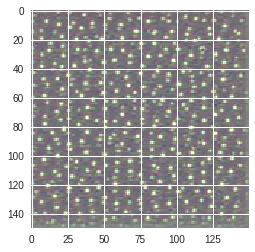

In [56]:
plt.imshow(generate_pattern('block3_conv1', 0))

#### Generating a grid of all filter response patterns in a layer

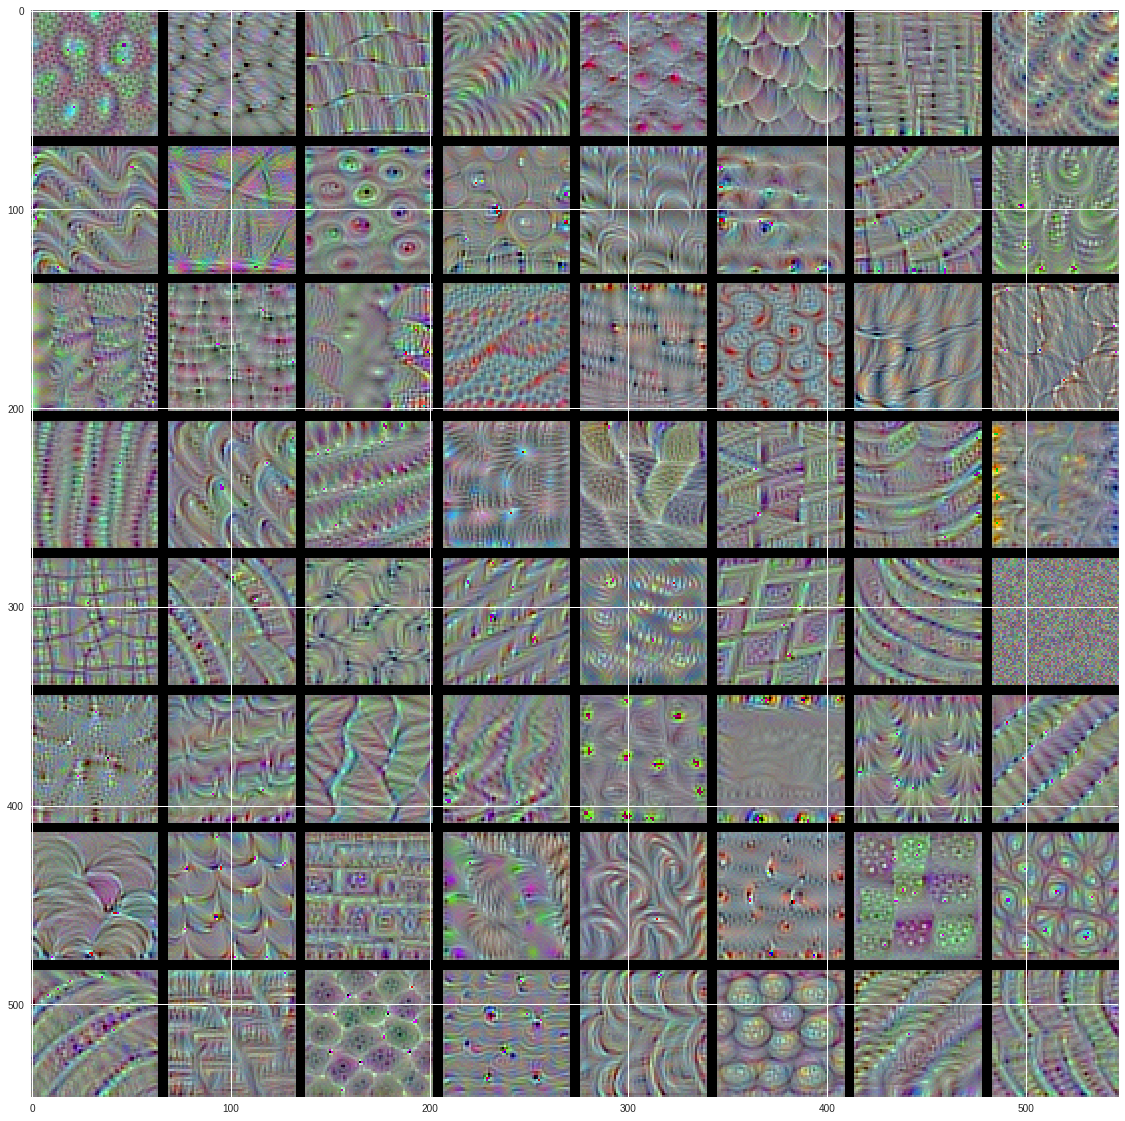

In [59]:
layer_name = 'block4_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
  for j in range(8):
    filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
    
    horizontal_start = i * size + i * margin
    horizontal_end = horizontal_start + size
    vertical_start = j * size + j * margin
    vertical_end = vertical_start + size
    results[horizontal_start: horizontal_end, 
            vertical_start: vertical_end, :] = filter_img
    
plt.figure(figsize=(20, 20))
plt.imshow(results)